Task #4
1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule
data: bioresponse.csv,
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.
3.	For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?
4.	Compare the accuracy of the models fitted with various BP algorithms.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MLT LABS/Lab4/bioresponse.csv')

In [4]:
random_state = 42

In [5]:
X = data.iloc[:, 1:].values
y = data.Activity.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state)
X_train = X_train.T
X_test = X_test.T

In [6]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

In [7]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b

In [8]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

Gradient descent

In [9]:
# optimize

def optimize_gd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

Adam

In [10]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate = 0.001,
                  print_cost = False, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    """
    This function optimizes w and b by running am adam algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the adam update rule
    b1 -- b1 coefficient
    b2 -- b2 coefficient
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    v = np.array([0,0])
    s = np.array([0,0])

    for i in range(num_iterations):
      grads, cost = propagate(w, b, X, Y)
      grad = np.array([grads['dw'],grads['db']],dtype=object)
      v = beta1 * v + (1 - beta1) * grad
      s = beta1 * s + (1 - beta1) * grad**2
      v_cor = v / (1 - beta1**(i+1))
      s_cor = s / (1 - beta2**(i+1))

      w -= learning_rate * v_cor[0] / (np.sqrt(s_cor[0]) + epsilon)
      b -= learning_rate * v_cor[1] / (np.sqrt(s_cor[1]) + epsilon)

      # Record the costs
      if i % 100 == 0:
          costs.append(cost)

          # Print the cost every 100 training iterations
          if print_cost:
              print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
                "b": b}

    grads = {"dw": grad[0],
                "db": grad[1]}

    return params, grads, costs

SGD

In [11]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost=False):

    costs = []

    for i in range(num_iterations):

        val = np.random.randint(0, X.shape[1])
        batch_x = X[:, val].reshape(-1, 1)
        batch_y = Y[val].reshape(-1, 1)

        grads, cost = propagate(w, b, batch_x, batch_y)

        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            gr, new_cost = propagate(w, b, X, Y)
            costs.append(new_cost)

            if print_cost:
                print("Cost after iteration %i: %f" % (i, new_cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [12]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [13]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, optimize=''):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    if optimize =='adam':
      parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimize =='sgd':
      parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    else:
      parameters, grads, costs = optimize_gd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
      print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
      print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [14]:
#2 optimizers results
sgd_res =  model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, optimize = 'sgd')

Cost after iteration 0: 0.691473
Cost after iteration 100: 0.685580
Cost after iteration 200: 0.677226
Cost after iteration 300: 0.670197
Cost after iteration 400: 0.665797
Cost after iteration 500: 0.659539
Cost after iteration 600: 0.663494
Cost after iteration 700: 0.663751
Cost after iteration 800: 0.644477
Cost after iteration 900: 0.643093
Cost after iteration 1000: 0.636629
Cost after iteration 1100: 0.633726
Cost after iteration 1200: 0.631552
Cost after iteration 1300: 0.627379
Cost after iteration 1400: 0.622798
Cost after iteration 1500: 0.618931
Cost after iteration 1600: 0.615392
Cost after iteration 1700: 0.614764
Cost after iteration 1800: 0.613915
Cost after iteration 1900: 0.606783
train accuracy: 72.09384998222538 %
test accuracy: 72.92110874200426 %


In [15]:
adam_res = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, optimize = 'adam')

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.602647
Cost after iteration 200: 0.519385
Cost after iteration 300: 0.460826
Cost after iteration 400: 0.419207
Cost after iteration 500: 0.388059
Cost after iteration 600: 0.363972
Cost after iteration 700: 0.344382
Cost after iteration 800: 0.327799
Cost after iteration 900: 0.313548
Cost after iteration 1000: 0.301197
Cost after iteration 1100: 0.290329
Cost after iteration 1200: 0.280668
Cost after iteration 1300: 0.271994
Cost after iteration 1400: 0.264150
Cost after iteration 1500: 0.256998
Cost after iteration 1600: 0.250445
Cost after iteration 1700: 0.244412
Cost after iteration 1800: 0.238834
Cost after iteration 1900: 0.233661
train accuracy: 91.64592961251333 %
test accuracy: 75.15991471215352 %


In [16]:
gd_res = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


In [18]:
#3 learning curves
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}
optimizer_names = ["gd", "sgd", "adam"]
for name in optimizer_names:
  results[name] = {}
  for lr in learning_rates:
    d = model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=lr, print_cost=False, optimize=name)
    results[name][lr] = {
        "costs": d["costs"],
        "train_accuracy": 100 - np.mean(np.abs(d["Y_prediction_train"] - y_train)) * 100,
        "test_accuracy": 100 - np.mean(np.abs(d["Y_prediction_test"] - y_test)) * 100
};

<ipython-input-8-ec01eb30d675>:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
<ipython-input-8-ec01eb30d675>:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


In [19]:
print('GD')
for lr in learning_rates:
    print(f'''lr = {lr}, train_acc = {results['gd'][lr]['train_accuracy']}, test_acc = {results['gd'][lr]['test_accuracy']}''')
print('SGD')
for lr in learning_rates:
    print(f'''lr = {lr}, train_acc = {results['sgd'][lr]['train_accuracy']}, test_acc = {results['sgd'][lr]['test_accuracy']}''')
print('Adam')
for lr in learning_rates:
    print(f'''lr = {lr}, train_acc = {results['adam'][lr]['train_accuracy']}, test_acc = {results['adam'][lr]['test_accuracy']}''')

GD
lr = 0.01, train_acc = 80.62566654816922, test_acc = 76.97228144989339
lr = 0.005, train_acc = 79.13259864912905, test_acc = 76.01279317697228
lr = 0.001, train_acc = 75.00888730892285, test_acc = 73.34754797441364
lr = 0.0005, train_acc = 72.91148240312833, test_acc = 73.45415778251599
lr = 0.0001, train_acc = 64.84180590117313, test_acc = 68.97654584221749
SGD
lr = 0.01, train_acc = 78.45716317099182, test_acc = 74.94669509594883
lr = 0.005, train_acc = 77.95947387131176, test_acc = 75.26652452025587
lr = 0.001, train_acc = 72.91148240312833, test_acc = 70.78891257995735
lr = 0.0005, train_acc = 72.91148240312833, test_acc = 74.20042643923242
lr = 0.0001, train_acc = 65.37504443654461, test_acc = 68.65671641791045
Adam
lr = 0.01, train_acc = 98.00924280127977, test_acc = 70.682302771855
lr = 0.005, train_acc = 97.61820120867401, test_acc = 71.74840085287846
lr = 0.001, train_acc = 94.84536082474227, test_acc = 72.38805970149254
lr = 0.0005, train_acc = 92.89015286171347, test_acc 

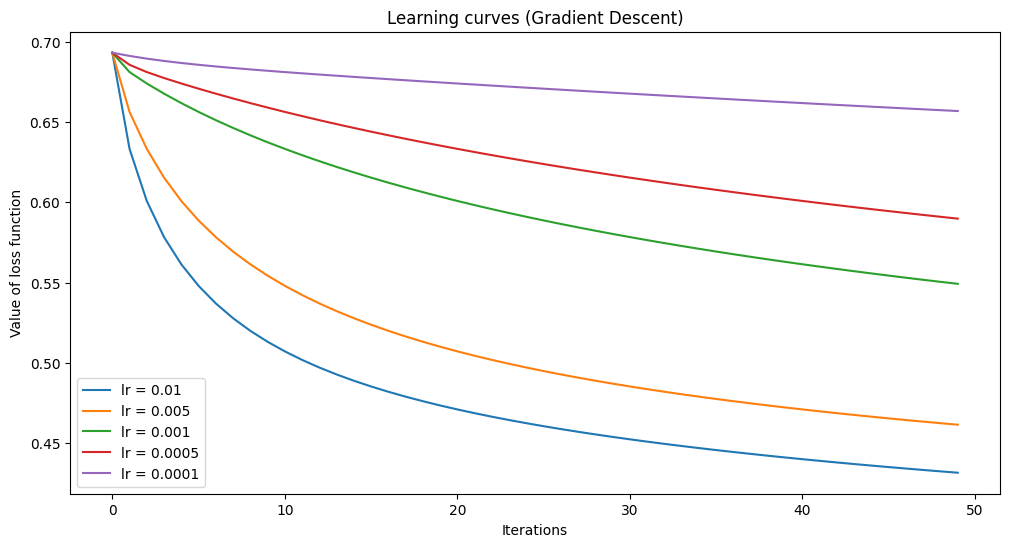

In [20]:
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(results["gd"][lr]['costs'], label=f"lr = {lr}")
plt.title(f"Learning curves (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Value of loss function")
plt.legend()
plt.show()

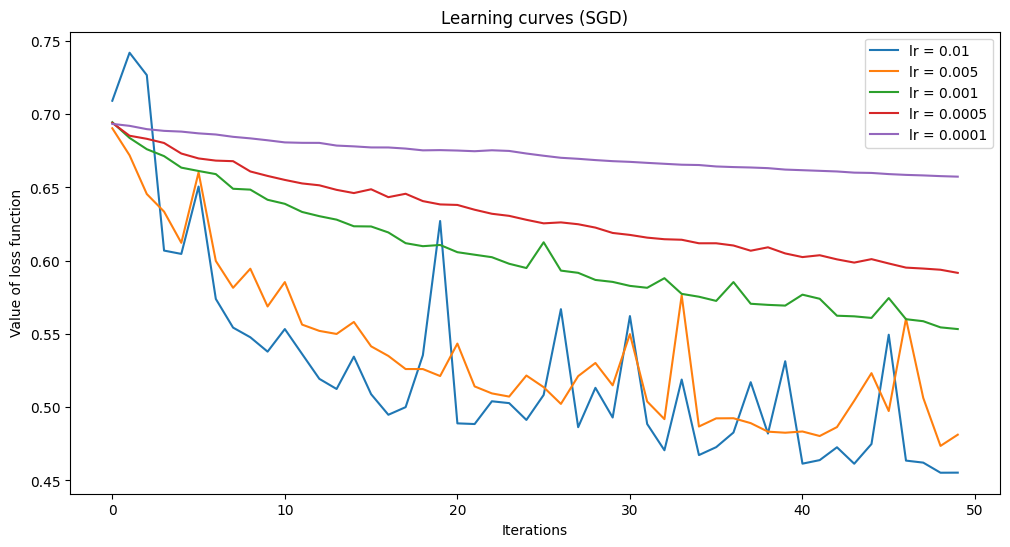

In [21]:
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(results["sgd"][lr]['costs'], label=f"lr = {lr}")
plt.title(f"Learning curves (SGD)")
plt.xlabel("Iterations")
plt.ylabel("Value of loss function")
plt.legend()
plt.show()

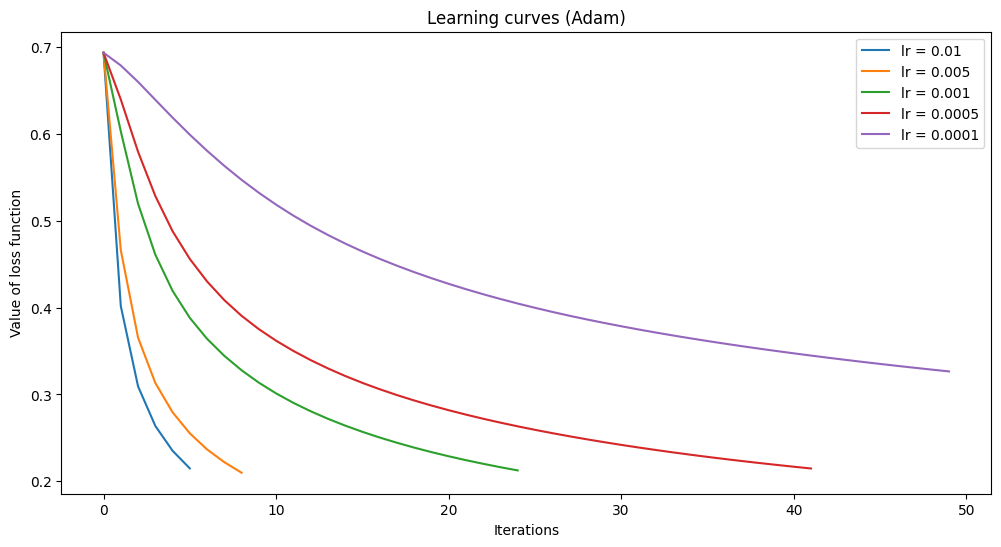

In [22]:
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(results["adam"][lr]['costs'], label=f"lr = {lr}")
plt.title(f"Learning curves (Adam)")
plt.xlabel("Iterations")
plt.ylabel("Value of loss function")
plt.legend()
plt.show()

Looking at the results, it's evident that the performance varies across different learning rates and optimization algorithms.

For Gradient Descent (GD), as the learning rate decreases, both training and test accuracies decline. This suggests that a higher learning rate, such as 0.01, leads to better performance. Notably, GD's learning curves appear stable, without oscillations.

In the case of Stochastic Gradient Descent (SGD), the trend is somewhat similar to GD. Higher learning rates result in better performance, but the model seems to be less sensitive to changes in the learning rate compared to GD. However, it's worth noting that, for learning rates greater than 0.005, the learning curves exhibit non-smooth behavior and oscillations. This suggests challenges in the optimization process, potentially indicating overshooting of the minimum and oscillations around it.

In contrast, the Adam optimizer exhibits a different behavior. Even with smaller learning rates, Adam achieves high training and test accuracies, surpassing the performance of GD and SGD. This highlights the effectiveness of adaptive learning rates and momentum in improving convergence.